# CI  for Monte Carlo

Let's compute confidence intervals for the Monte Carlo simulation to find the expected number of unique faces we get in consecutive dice rolls.

## Rolling a Dice Example

Suppose that you have a 6-face dice. What is the expected number of unique faces that you will get in 5 rolls?

In [3]:
import numpy as np

def Num_Diff_Cards():
    """Returns how many unique roll there are in a 5 roll sample """
    
    cards = np.random.randint(1,6,5)
    num_unique = 0
    cards_seen = []
    for card in cards:
        if card in cards_seen:
            continue
        else:
            num_unique+=1
            cards_seen+=[card]
    
    return num_unique

In [4]:
import math

def Monte_Carlo_Cards(N):
    """Runs Monte Carlo"""
    
    list_num_unique = []
    for trial in range(N):
        num_unique = Num_Diff_Cards()
        list_num_unique+=[num_unique]
        
    avg = np.mean(list_num_unique)
    stdev = np.std(list_num_unique)
    CI_width = stdev/math.sqrt(N)
    print("%d number of trials with stdev of %0.2f" %(N, stdev))
    
    return avg,CI_width

N=40
Monte_Carlo_Cards(N)

40 number of trials with stdev of 0.70


(3.375, 0.1100426053853688)

Lets look at how the width of the confidence interval and mean changes as a function of $N$.

1000 number of trials with stdev of 0.71
5000 number of trials with stdev of 0.71
10000 number of trials with stdev of 0.72
50000 number of trials with stdev of 0.72
100000 number of trials with stdev of 0.71


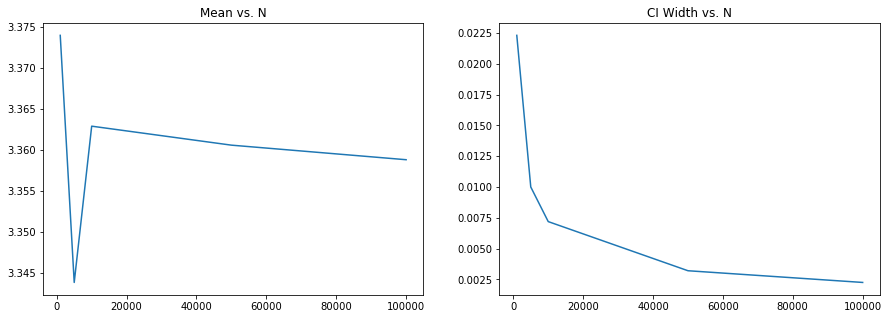

In [36]:
%matplotlib inline

import matplotlib.pyplot as plt

N_list = [1000,5000,10000, 50000, 100000]
CI_width_list = []
avg_list = []
for N in N_list:
    
    avg,width = Monte_Carlo_Cards(N)
    CI_width_list+=[width]
    avg_list+=[avg]
    
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1, title = "Mean vs. N")
plt.plot(N_list,avg_list)
fig.add_subplot(1,2,2, title = "CI Width vs. N")
plt.plot(N_list,CI_width_list)

# Optimization via Monte Carlo Simulation

Let us compute the optimal porfolio allocation using a monte carlo simulation over 3 stocks. 


In [7]:
import numpy as np

def Sample_Returns(investments_dict, mean_dict, stdev_dict):
    """Take as input a dictionary containing the investments in the
    three stock as well as two other dictionaries containg the stock info and output return 
    for a single trial"""
    
    total = 0
    for stock in investments_dict:
        
        mean = mean_dict[stock]
        stdev = stdev_dict[stock]
        return_ = np.random.normal(mean, stdev)/100
        
        amt_invested = investments_dict[stock]
        total += amt_invested*(1+return_)
        
    if total<1000:
        return -10_000
    else:
        return total
        

investments_dict = {"O": 0, "M":1000, "S":0}
mean_dict = {"O":8 , "M":15, "S":3}
stdev_dict = {"O":6 , "M":15, "S":1}

Sample_Returns(investments_dict, mean_dict, stdev_dict)

1325.5839443919656

In [11]:
def Monte_Carlo_Portfolio(N, investments_dict, mean_dict, stdev_dict):
    """Run the Monte Carlo N for trials to compute the expected return of
    investment strategy  in in investment_dict"""
    #return np.mean([Sample_Returns(investments_dict, mean_dict, stdev_dict) for i in range(N)])

    total = 0
    for i in range(N):
        total+=Sample_Returns(investments_dict, mean_dict, stdev_dict)
    avg_return = total/N
    
    return avg_return

N=100000
investments_dict = {"O": 0, "M":1000, "S":0}
mean_dict = {"O":8 , "M":15, "S":3}
stdev_dict = {"O":6 , "M":15, "S":1}
Monte_Carlo_Portfolio(N,investments_dict, mean_dict, stdev_dict)

-580.3477033179954

In [12]:
def Portfolio_Opt(N, mean_dict, stdev_dict):
    """Enumerates over all feasible investmenet strategies and picks the best"""
    best_return  = 0
    investments_dict={}
    for inv_O in range(0,1000,25):
        for inv_M in range(0,1000,25):
            for inv_S in range(0,1000,25):
                #Figure out best
                total_inv = inv_O + inv_M + inv_S
                if total_inv<=1000:
                    investments_dict["O"] = inv_O
                    investments_dict["M"] = inv_M
                    investments_dict["S"] = inv_S
                    return_ = Monte_Carlo_Portfolio(N,investments_dict, mean_dict, stdev_dict)
                    if return_ > best_return:
                        best_allocation = investments_dict
                        best_return = return_
    return best_allocation, best_return



In [18]:
mean_dict = {"O":8 , "M":15, "S":3}
stdev_dict = {"O":6 , "M":15, "S":1}
Portfolio_Opt(5, mean_dict, stdev_dict)

({'M': 25, 'O': 975, 'S': 0}, 1260.1966775054582)